# Import library and data

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import datasets
books = pd.read_csv(r'C:\Users\Ojo Ridwan\Downloads\archive (13)\Books.csv')
users = pd.read_csv(r'C:\Users\Ojo Ridwan\Downloads\archive (13)\Users.csv')
ratings = pd.read_csv(r'C:\Users\Ojo Ridwan\Downloads\archive (13)\Ratings.csv')

C:\Users\Ojo Ridwan\AppData\Local\Temp\ipykernel_19336\335073962.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv(r'C:\Users\Ojo Ridwan\Downloads\archive (13)\Books.csv')


In [11]:
# First 3 rows of books dataset
print('BOOKS')
display(books.head(3))
print()
print('USERS')
display(users.head(3))
print()
print('RATINGS')
display(ratings.head(3))

BOOKS


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...



USERS


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN



RATINGS


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


In [12]:
# Rows and columns of all datasets
print(books.shape)
print(users.shape)
print(users.shape)

(271360, 8)
(278858, 3)
(278858, 3)


In [18]:
# Info of all datasets
print(books.info())
print( '=' * 100)
print(users.info())
print( '=' * 100)
print(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), obje

In [13]:
# Check for non values in the datasets
print(books.isnull().sum())
print( '=' * 50)
print(users.isnull().sum())
print( '=' * 50)
print(ratings.isnull().sum())

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64
User-ID          0
Location         0
Age         110762
dtype: int64
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


In [23]:
# Check for duplicate values in the datasets
print(books.duplicated().sum())
print(users.duplicated().sum())
print(ratings.duplicated().sum())

0
0
0


In [24]:
# Remove unwanted rows
books.drop(books[books['Year-Of-Publication']=='DK Publishing Inc'].index, inplace=True)
books.drop(books[books['Year-Of-Publication']=='Gallimard'].index, inplace=True)
books = books.astype({'Year-Of-Publication' : 'int'})
books = books[books['Year-Of-Publication']>=1900]

In [19]:
books.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [25]:
#statistics of books dataset
books.describe()

,Year-Of-Publication
count,266735.000000
mean,1993.695462
std,8.142569
min,1900.000000
25%,1989.000000
50%,1996.000000
75%,2000.000000
max,2050.000000


In [26]:
#statistics of ratings dataset
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [27]:
#statistics of users dataset
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [28]:
#merge books and ratings dataset to find ratings on each book
ratings_with_names = pd.merge(books, ratings, on='ISBN')

In [29]:
ratings_with_names.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0


# EDA

In [30]:
#top 10 books and authors have 10 ratings
ratings_with_names.sort_values(by='Book-Rating' , ascending=False).head(10)[['Book-Title', 'Book-Author']]

,Book-Title,Book-Author
508559,Dragons of Winter Night,Margaret Weis
118859,The Hours: A Novel,Michael Cunningham
356041,The Foot Book (Nifty Lift-And-Look Books),Dr. Seuss Enterprises
118838,The Hours: A Novel,Michael Cunningham
356053,The Association,Bentley Little
356063,The Association,Bentley Little
802824,N Is for Noose,Sue Grafton
715285,The Green Mile : The Complete Serial Novel,Stephen King
118827,The Hours: A Novel,Michael Cunningham
356076,A Ride into Morning: The Story of Tempe Wick,Ann Rinaldi


In [31]:
#top 10 authors have overall maximum ratings
ratings_with_names.groupby(['Book-Author']).sum().sort_values(by='Book-Rating' , ascending=False).head(10).index

Index(['Stephen King', 'Nora Roberts', 'John Grisham', 'James Patterson',
       'J. K. Rowling', 'Mary Higgins Clark', 'Janet Evanovich',
       'Dean R. Koontz', 'Sue Grafton', 'Anne Rice'],
      dtype='object', name='Book-Author')

In [32]:
#top 10 authors have overall mimimum ratings
ratings_with_names.groupby(['Book-Author']).sum().sort_values(by='Book-Rating').head(10).index

Index(['Joseph Gerard Brennan', 'Julie Adams Church', 'Julie Bertagna',
       'Julie Bettie', 'Julie Brinckloe', 'Julie Chimes', 'Julie Coryell',
       'Julie Dalton', 'Julie Davey', 'Julie Degalan'],
      dtype='object', name='Book-Author')

In [33]:
#top 10 books and authors have 0 ratings
ratings_with_names.sort_values(by='Book-Rating').head(10)[['Book-Title', 'Book-Author']]

,Book-Title,Book-Author
0,Classical Mythology,Mark P. O. Morford
602938,Bastion Falls,Susie Moloney
602939,Bastion Falls,Susie Moloney
602940,Bastion Falls,Susie Moloney
602941,Bastion Falls,Susie Moloney
602942,Bastion Falls,Susie Moloney
602943,Bastion Falls,Susie Moloney
602945,After the Rain,Norma Fox Mazer
602946,After the Rain,Norma Fox Mazer
602947,After the Rain,Norma Fox Mazer


In [34]:
#in 2002 year amximum books are published is 91800
ratings_with_names['Year-Of-Publication'].value_counts().head(1)

Year-Of-Publication
2002    91800
Name: count, dtype: int64

In [35]:
#Stephen King published maxmum books is 9967
ratings_with_names['Book-Author'].value_counts().head(1)

Book-Author
Stephen King    9967
Name: count, dtype: int64

In [36]:
#maximum people give rating on Wild Animus is 2502
ratings_with_names['Book-Title'].value_counts().head(1)

Book-Title
Wild Animus    2502
Name: count, dtype: int64

# Data Visualization

In [37]:
#import data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

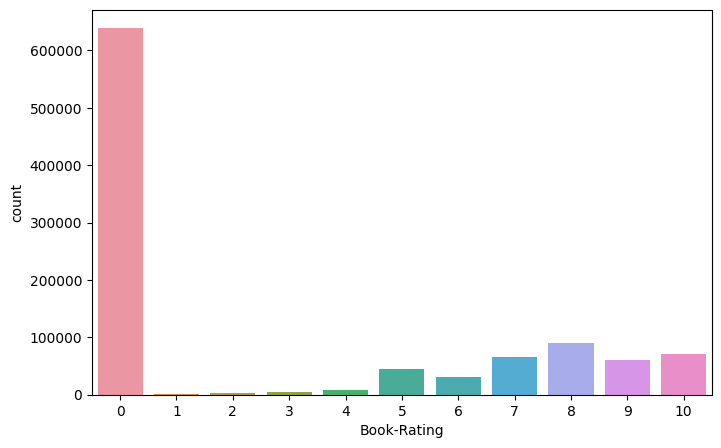

In [38]:
#bar graph according to rating on books
plt.figure(figsize=(8,5))
sns.countplot(x='Book-Rating', data=ratings_with_names)
plt.show()

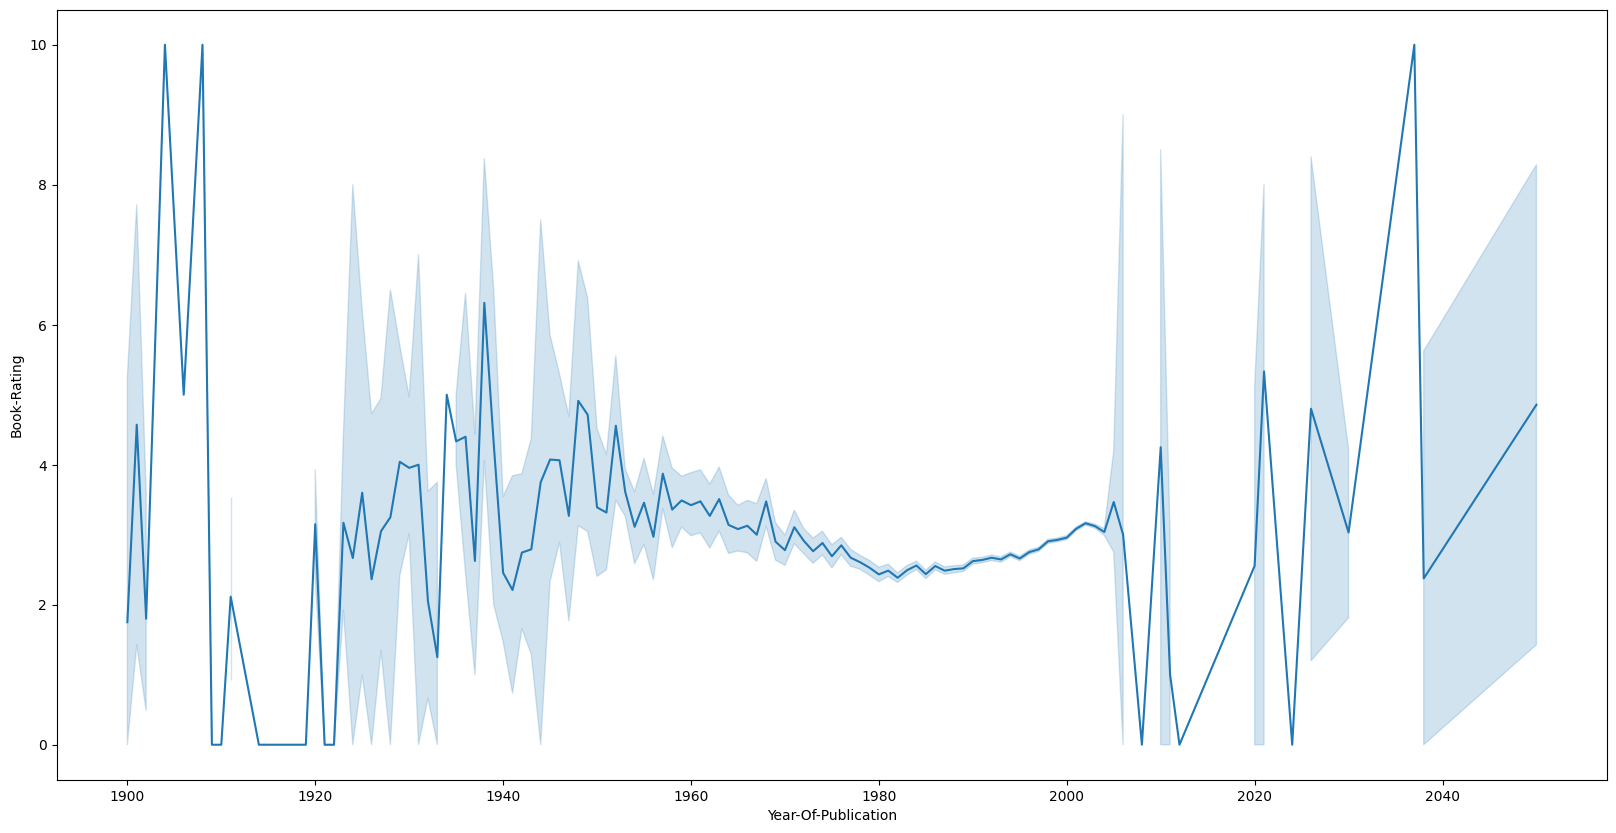

In [39]:
#lineplot according to year of publication and ratings on books
plt.figure(figsize=(20,10))
sns.lineplot(x='Year-Of-Publication',y='Book-Rating', data=ratings_with_names)
plt.show()

In [40]:
#correlation plot
plt.figure(figsize=(10,10))
sns.heatmap(ratings_with_names.corr(),vmin=-1,vmax=1,center=0,annot=True)
plt.show()

ValueError: could not convert string to float: '074322678X'

<Figure size 1000x1000 with 0 Axes>

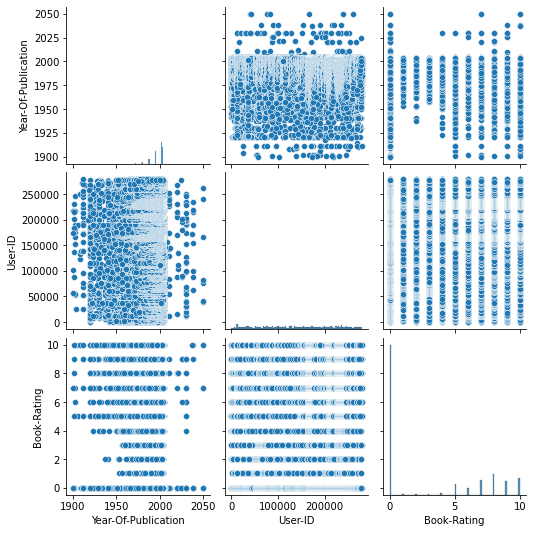

In [ ]:
#pairplot
sns.pairplot(data=ratings_with_names)
plt.show()

# Top 50 Books with 250 ratings 

In [ ]:
#books with number of people rating on it
num_rating_df = ratings_with_names['Book-Title'].value_counts().reset_index()
num_rating_df = num_rating_df.rename(columns={'index' : 'Book-Title' , 'Book-Title' : 'num_ratings'})
num_rating_df.head()

,Book-Title,num_ratings
0,Wild Animus,2502
1,The Lovely Bones: A Novel,1295
2,The Da Vinci Code,897
3,A Painted House,838
4,The Nanny Diaries: A Novel,828


In [ ]:
#books with number of people average rating on it
avg_rating_df = ratings_with_names.groupby('Book-Title').mean()['Book-Rating'].reset_index()
avg_rating_df = avg_rating_df.rename(columns={'Book-Rating' : 'avg_rating'})
avg_rating_df.head()

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.25
1,Always Have Popsicles,0.00
2,Apple Magic (The Collector's series),0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.00
4,Beyond IBM: Leadership Marketing and Finance ...,0.00


In [ ]:
#top 50 books where ratings 250 people rating on it
popularity_df = pd.merge(num_rating_df, avg_rating_df, on='Book-Title')
popularity_df = popularity_df[popularity_df['num_ratings']>250].sort_values('avg_rating', ascending = False).head(50)
popularity_df = pd.merge(popularity_df, books, on = 'Book-Title').drop_duplicates('Book-Title')
popularity_df = popularity_df[['Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-M']]
popularity_df.head()

,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439136350.0...
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,1998,Scholastic,http://images.amazon.com/images/P/0590353403.0...
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic,http://images.amazon.com/images/P/043935806X.0...
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439064872.0...


# Colleborative Filtering

In [ ]:
#books on which more than 200 people rating on it
x = ratings_with_names.groupby('User-ID').count()['Book-Rating']>200
rated_users = x[x].index
Filtered_users = ratings_with_names[ratings_with_names['User-ID'].isin(rated_users)]

In [ ]:
#users who have rated more than 50 books
y = Filtered_users['Book-Title'].value_counts()>=50
famous_books = y[y].index
Final_ratings = Filtered_users[Filtered_users['Book-Title'].isin(famous_books)]

In [ ]:
#pivot table for vertorization
pt = Final_ratings.pivot_table(index= 'Book-Title', columns=('User-ID'), values='Book-Rating')

In [ ]:
pt.fillna(0, inplace=True)
pt.head()

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#import sklearn library for cosine difference
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
#similar vectors
similarity_score = cosine_similarity(pt)

In [ ]:
similarity_score.shape

(698, 698)

In [ ]:
np.where(pt.index == '1984')[0][0]

0

In [ ]:
sorted(list(enumerate(similarity_score[0])), key=lambda x:x[1], reverse = True)[1:11]

[(47, 0.27777745397011955),
 (538, 0.26396193711234966),
 (82, 0.2366937434740099),
 (626, 0.23591670663157352),
 (544, 0.2262639743141286),
 (178, 0.22222254415660225),
 (494, 0.21057743765309012),
 (339, 0.20675540390453995),
 (547, 0.20025063706783053),
 (514, 0.19972624710300058)]

In [ ]:
pt.index[0]

'1984'

In [ ]:
#function of top 10 recommended books
def recommend(book_name):
    index = np.where(pt.index == book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_score[index])), key=lambda x:x[1], reverse = True)[1:11]
    for i in similar_items:
        print(pt.index[i[0]])        

In [ ]:
#recommendations
recommend('The Notebook')

A Walk to Remember
The Rescue
One Door Away from Heaven
Toxin
The Five People You Meet in Heaven
Nights in Rodanthe
Suzanne's Diary for Nicholas
Everything's Eventual : 14 Dark Tales
The Guardian
Fine Things


# Pickle

In [ ]:
#pickle for web development
import pickle
pickle.dump(pt.to_dict(), open('books.pkl' , 'wb'))
loaded_model = pickle.load(open('books.pkl' , 'rb'))
pickle.dump(similarity_score, open('similarity.pkl', 'wb'))

In [ ]:
pickle.dump(books.to_dict(), open('img.pkl' , 'wb'))
loaded_img = pickle.load(open('img.pkl' , 'rb'))